In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data=pd.read_excel("/content/drive/MyDrive/SD03Q04/Social_Network_Ads.xlsx")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User ID           400 non-null    int64 
 1   Gender            400 non-null    object
 2   Age               400 non-null    int64 
 3   EstimatedSalary   400 non-null    int64 
 4   Purchased         400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


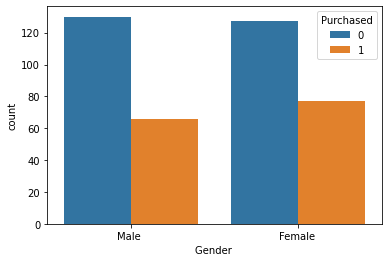

In [6]:
sns.countplot(x='Gender ',hue='Purchased',data=data)

 From the above plot we can see that the number of females who buy the product are more than that of the males. So if the customer is a female, then she is more likely to buy the product. 


### Now let us analyse how the customer response varies with the age

For that we should know the customer demographics and details about the mean age of our customers

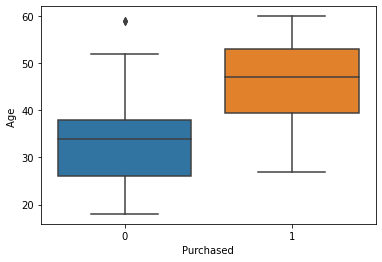

In [7]:
sns.boxplot(x='Purchased',y='Age ',data=data)

In [9]:
data['Age '].describe()

count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age , dtype: float64

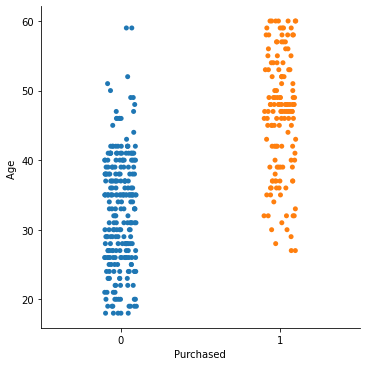

In [10]:
sns.catplot(x='Purchased',y='Age ',data=data)

From the above summary statistics about the age attribute, we can categorize the customers into three age categories : 

    --> less than 30 years as "Young" 
    --> 30 to 50 years as "MIDDLE"
    --> Greater than 50 years as "OLD" 
 We can now plot the count of customers in each category who have purchased our product. 

In [11]:
def categorize(a):
    if a<30:
        return "Young"
    elif a>=30 and a<=50:
        return "Middle"
    elif a>50:
        return "Old"

In [ ]:
data['Age_category']=data['Age '].apply(lambda x: categorize(x))
data['Age_category'].value_counts()

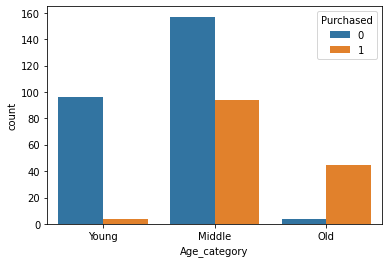

In [13]:
sns.countplot(x='Age_category',hue='Purchased',data=data)

Looking at this plot we can easily see that customers who are greater that 30 years of age are more likely to buy the product. Also when we compare the middle and old age, the purchase percentage is higher in the old age category( >50 years). 

In [14]:
data['EstimatedSalary '].describe()

count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: EstimatedSalary , dtype: float64

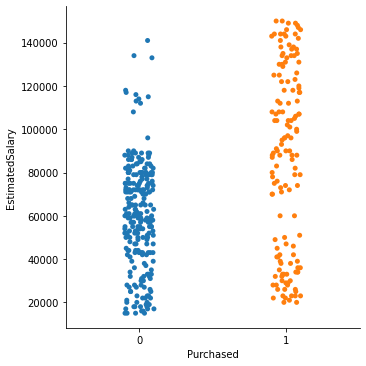

In [15]:
sns.catplot(x='Purchased',y='EstimatedSalary ',data=data)

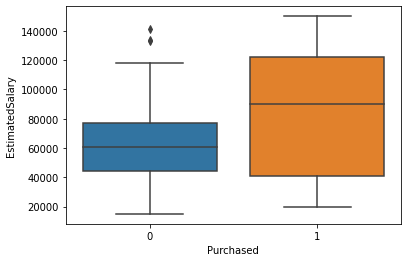

In [16]:
sns.boxplot(x='Purchased',y='EstimatedSalary ',data=data)

From the above box plots we can see that 50% of the customers who purchased from the ads earn between 40000 to 100000.
We can split the earnings into three groups so that we can get a better understanding about the salary range in which the purchases are high. 

In [18]:
def cate_sal(a):
    if a<45000:
        return " < 45000"
    elif a>=45000 and a<=70000:
        return " > 45000 and < 70000"
    elif a> 70000:
        return " > 70000"

In [19]:
data['Salary_category']=data['EstimatedSalary '].apply(lambda x: cate_sal(x))

In [21]:
data['Salary_category'].value_counts()

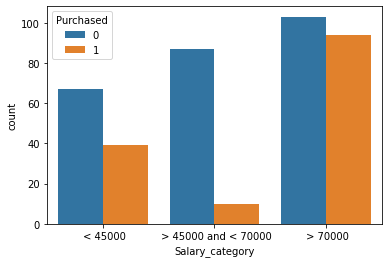

In [20]:
sns.countplot(x='Salary_category',hue='Purchased',data=data)

This plot shows that the customers with salary greater than 70000 are more likely to buy through the ads. The purchase percentange of customers to whome the ads are shown is very high in the salary range >70000 than the customers with less salary.But it is a bit strange to see customers with salary greater than 45000 purchase less than customers with salry less than 45000. 

In [22]:

data['Gender ']=data['Gender '].apply(lambda x: 0 if x=="Female " else 1)

In [23]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Age_category,Salary_category
0,15624510,1,19,19000,0,Young,< 45000
1,15810944,1,35,20000,0,Middle,< 45000
2,15668575,0,26,43000,0,Young,< 45000
3,15603246,0,27,57000,0,Young,> 45000 and < 70000
4,15804002,1,19,76000,0,Young,> 70000


In [24]:
data.drop(['User ID '],axis=1,inplace=True)

In [25]:
X= data.iloc[:, [0,1,2]].values  
Y= data["Purchased"].values

In [26]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [27]:
# Splitting dataset into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0 ) 


In [28]:
from scipy.stats import mode
class K_Nearest_Neighbors_Classifier() :  
      
    def __init__( self, K ) : 
          
        self.K = K 
          
    # Function to store training set 
          
    def fit( self, X_train, Y_train ) : 
          
        self.X_train = X_train 
          
        self.Y_train = Y_train 
          
        # no_of_training_examples, no_of_features 
          
        self.m, self.n = X_train.shape 
      
    # Function for prediction 
          
    def predict( self, X_test ) : 
          
        self.X_test = X_test 
          
        # no_of_test_examples, no_of_features 
          
        self.m_test, self.n = X_test.shape 
          
        # initialize Y_predict 
          
        Y_predict = np.zeros( self.m_test ) 
          
        for i in range( self.m_test ) : 
              
            x = self.X_test[i] 
              
            # find the K nearest neighbors from current test example 
              
            neighbors = np.zeros( self.K ) 
              
            neighbors = self.find_neighbors( x ) 
              
            # most frequent class in K neighbors 
              
            Y_predict[i] =mode( neighbors )[0][0]     
              
        return Y_predict 
      
    # Function to find the K nearest neighbors to current test example 
            
    def find_neighbors( self, x ) : 
          
        # calculate all the euclidean distances between current  
        # test example x and training set X_train 
          
        euclidean_distances = np.zeros( self.m ) 
          
        for i in range( self.m ) : 
              
            d = self.euclidean( x, self.X_train[i] ) 
              
            euclidean_distances[i] = d 
          
        # sort Y_train according to euclidean_distance_array and  
        # store into Y_train_sorted 
          
        inds = euclidean_distances.argsort() 
          
        Y_train_sorted = self.Y_train[inds] 
          
        return Y_train_sorted[:self.K] 
      
    # Function to calculate euclidean distance 
              
    def euclidean( self, x, x_train ) : 
          
        return np.sqrt( np.sum( np.square( x - x_train ) ) ) 
  
# Driver code 
  


In [29]:

    # Importing dataset 
    # Model training 
model_knn = K_Nearest_Neighbors_Classifier( K = 3 )       
model_knn.fit( X_train, Y_train ) 
#model1 = KNeighborsClassifier( n_neighbors = 3 ) 
#model1.fit( X_train, Y_train ) 
      


In [30]:
    # Prediction on test set 
Y_pred_knn = model_knn.predict( X_test ) 


In [31]:

#Y_pred1 = model1.predict( X_test ) 
      
    # measure performance 
      
correctly_classified = 0
correctly_classified1 = 0
      
    # counter 
count = 0
for count in range(np.size(Y_pred_knn)):
    if Y_test[count] == Y_pred_knn[count] :
        correctly_classified = correctly_classified + 1
    count = count + 1
print( "Accuracy on test set by our model       :  ", (correctly_classified / count ) * 100 ) 
#print( "Accuracy on test set by sklearn model   :  ", (correctly_classified1 / count ) * 100 ) 
      

Accuracy on test set by our model       :   92.5


In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn1=K_Nearest_Neighbors_Classifier(3)

In [34]:
knn1.fit( X_train, Y_train ) 

In [35]:
 y1p=knn1.predict(X_test)


In [36]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y1p))

Accuracy: 0.925
